In [28]:
import tensorflow

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np 
import matplotlib.pyplot as plt

In [29]:
tokenizer = Tokenizer()

data = open("coldplay_lyrics.txt", encoding="utf8").read()

In [30]:
dataset = data.lower().split("\n")
for data in dataset:
    if data=='':
        dataset.remove('')
print(dataset)

['i wanna be bigger, stronger, drive a faster car', 'to take me anywhere in seconds', 'to take me anywhere i wanna go', 'and drive around a faster car', 'i will settle for nothing less', 'i will settle for nothing less', 'i wanna be bigger, stronger, drive a faster car', 'at the touch of a button', 'i can go anywhere i wanna go', 'and drive around my faster car', 'i will settle for nothing less', 'i will settle for nothing less', 'i think i want to change my altitude', 'i think i want to change my oxygen', 'i think i want to change my air', 'my atmosphere', 'i wanna recharge', 'i wanna be bigger, stronger, drive a faster car', 'to take me anywhere in seconds', 'to take me anywhere i wanna go', 'and drive around my faster car', 'i will settle for nothing less', 'i will settle for nothing less', 'i think i need to change my attitude', 'i think i want to change my oxygen', 'i think i want to change my air', 'my atmosphere', 'i wanna choke', 'bigger and better', 'bigger and better', 'bigge

In [31]:
tokenizer.fit_on_texts(dataset)
total_words = len(tokenizer.word_index) + 1

In [32]:
print(tokenizer.word_index)
print(total_words)

{'i': 1, 'you': 2, 'the': 3, 'and': 4, 'a': 5, 'to': 6, 'oh': 7, 'it': 8, 'in': 9, 'me': 10, 'my': 11, 'on': 12, 'of': 13, "i'm": 14, 'your': 15, 'all': 16, 'that': 17, 'for': 18, 'be': 19, "don't": 20, 'so': 21, 'when': 22, 'just': 23, 'is': 24, 'up': 25, 'we': 26, 'know': 27, 'go': 28, 'get': 29, "it's": 30, 'but': 31, 'come': 32, "you're": 33, 'see': 34, 'this': 35, 'ooh': 36, 'what': 37, 'yeah': 38, 'are': 39, 'want': 40, 'love': 41, 'if': 42, 'do': 43, 'gonna': 44, 'never': 45, 'no': 46, 'down': 47, 'can': 48, 'like': 49, 'got': 50, 'with': 51, 'they': 52, 'now': 53, 'was': 54, 'world': 55, 'say': 56, 'how': 57, 'out': 58, 'could': 59, 'one': 60, 'as': 61, 'let': 62, 'feel': 63, 'from': 64, 'not': 65, 'time': 66, 'doo': 67, 'light': 68, 'us': 69, 'there': 70, "you'll": 71, 'way': 72, 'where': 73, "i'll": 74, 'life': 75, 'head': 76, 'away': 77, 'ever': 78, 'at': 79, 'every': 80, 'will': 81, 'around': 82, 'have': 83, 'wanna': 84, 'here': 85, "can't": 86, "that's": 87, 'such': 88, "'

In [33]:
input_sequences = []
for line in dataset:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequences = token_list[:i+1]
        input_sequences.append(n_gram_sequences)

In [34]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [35]:
for s in input_sequences:
    print(s)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 84]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 84 19]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   1  84  19 343]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1  84  19 343 633]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
  84  19 343 633 344]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  84
  19 343 633 344   5]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  84  19
 343 633 344   5 446]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  84  19 343
 633 344   5 446 273]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   6 127]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   6 127  10]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   6 127  10 447]
[  

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  1 27  1 54]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4
   1  27   1  54 175]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 31  1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 31  1 91]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 31  1 91 62]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 31  1 91 62  2]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 31  1 91 62  2 47]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7 38]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7 38  7]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7 38  7 38]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7 38  7 38  7]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7 38  7 38  7 38]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7 38  7 38  7 38  1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7 38  

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   4 414  10  15]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   4 414  10  15 768]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   7 333]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   7 333  28]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   7 333  28  92]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   7 333  28  92   6]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   7
 333  28  92   6   3]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   7 333
  28  92   6   3 182]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 463   9]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 463   9 977]
[  0   0   0   0   0   0   0   0   0   0   0   0  

   0   0   1 173   5]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    1  173    5 1402]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    1  173    5 1402  652]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  173    5 1402  652   10]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    1  173    5 1402  652   10    5]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    1  173    5 1402  652   10    5 1021]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14 12]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14 12  3]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0   14   12    3 1020]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0   14   12    3 1020    1]
[   0    0

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4 14 65 44 56]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4 14 65 44 56  1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4 14 65 44 56  1 20]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4  14  65
  44  56   1  20 201]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   4  14  65  44
  56   1  20 201  17]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 33  3]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  33   3 669]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  33   3 669  17]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  33   3 669  17  14]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  33
   3 669  17  14 670]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  33   3
 669  17  14 670  79]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 597   4]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 597   4  14]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  23 159]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  23 159 245]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  23 159 245   3]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  23 159 245   3 145]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  23
 159 245   3 145 676]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  23 159
 245   3 145 676 224]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 1499 1065]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 597   4]
[  0   0   0   0   0   0   

   0   0   0 191  54]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 191  54   5]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 191  54   5 478]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 191  54   5 478  13]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191
  54   5 478  13 199]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 191 221]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 191 221   2]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 191 221   2  59]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 191 221   2  59  34]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191
 221   2  59  34  15]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 221
   2  59  34  15 354]
[  0   0   0   0   0   0   0

    0   64  471    3 1133  121    5  885  248]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20 40]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20 40  6]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20 40  6 34]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  20  40   6  34 489]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   20   40    6   34  489 1663]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0   20   40    6   34  489 1663 1664]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0  249 1665]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0  249 1665   19]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0  249 1665   19    5]
[   0    0    0    0    0    0    0    0    0    0    0

   0   0   0 313   5]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 313   5  68]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 313   5  68   5]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 313   5  68   5  68]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 313
   5  68   5  68  12]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 3]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   9   3 382]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   9   3 382 148]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   9   3 382 148   3]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   9
   3 382 148   3 619]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 3]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   9   3 382]
[  0   0   0   0   0   0   

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 63 11 90]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1  63  11  90 471]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
  63  11  90 471  11]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  63
  11  90 471  11 457]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  1 63]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  1 63 11]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  1 63 11 90]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4
   1  63  11  90 436]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 2]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   7   2 219]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   7   2 219  10]
[  0   0   0   0   0   0   0   0   0   0   0   0  

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0 144  44  29   8
  29   8 132 103  53]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 44 29]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 44 29  8]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 44 29  8 29]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 44 29  8 29  8]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  44
  29   8  29   8 132]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  44  29
   8  29   8 132 714]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 44 29]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 44 29  8]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 44 29  8 29]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 44 29  8 29  8]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  44
  29   8  29   8 132]
[  0   0   0   0   0   0   0   0   0   0   0   0   0

   7   4  33  21 304]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   7
   4  33  21 304  77]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  87 407]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  87 407]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  14 407]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 444  39]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 444  39   2]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 444  39   2  58]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 444  39   2  58  70]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0  444 1919]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 89 16  1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 89 16  1 40]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 89 16  1 40  9]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 89 16  1 40  9 35]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 89 16  1 40  9 35 55]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 16  1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 16  1 40]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 16  1 40  9]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 16  1 40  9 35]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 16  1 40  9 35 55]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 24 18]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 24 18  2]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 24 18  2  6]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 24 18  2  6 32]
[  0  

   0   0   0   1 221]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   1 221   2]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   1 221   2  45]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1 221   2  45  29]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
 221   2  45  29 630]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1 221
   2  45  29 630   9]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1 221   2
  45  29 630   9 631]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1 221   2  45
  29 630   9 631 158]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 21 52]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  21  52 808]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  21  52 808   3]
[   0    0    0    0    0    0    0    0    0    0  

  83   2 221  31   2]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  57 563 593  83
   2 221  31   2  86]
[  0   0   0   0   0   0   0   0   0   0   0   0   0  57 563 593  83   2
 221  31   2  86 288]
[  0   0   0   0   0   0   0   0   0   0   0   0  57 563 593  83   2 221
  31   2  86 288   5]
[  0   0   0   0   0   0   0   0   0   0   0  57 563 593  83   2 221  31
   2  86 288   5 483]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 87 57]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 87 57  2]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 87 57  2 34]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 87 57  2 34  3]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 87 57  2 34  3 55]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 87 57  2 34  3 55 31]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 87 57  2 34  3 55 31 20]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 87 57  2 34  3 55 31 20  2]
[  0   0   0   0   0   0   0  

 129  50   6  29 165]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4 129
  50   6  29 165  21]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4 129  50
   6  29 165  21 207]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   4 129  50   6
  29 165  21 207  17]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   4 129  50   6  29
 165  21 207  17   1]
[  0   0   0   0   0   0   0   0   0   0   0   0   4 129  50   6  29 165
  21 207  17   1 232]
[  0   0   0   0   0   0   0   0   0   0   0   4 129  50   6  29 165  21
 207  17   1 232   6]
[  0   0   0   0   0   0   0   0   0   0   4 129  50   6  29 165  21 207
  17   1 232   6  43]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 150   1]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 150   1 330]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 150   1 330  25]
[ 0  0  0  0  0  0  0  0  0 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  57 250]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  57 250 154]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  57 250 154  48]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0   57  250  154   48 1211]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   57  250  154   48 1211   58]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0   57  250  154   48 1211   58   13]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0   57  250  154   48 1211   58   13   15]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
   57  250  154   48 1211   58   13   15  803]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0   57 2283]
[   0  

In [36]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tensorflow.keras.utils.to_categorical(labels, num_classes=total_words)

In [37]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Embedding(total_words, 200, input_length=max_sequence_len-1),
    tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(200)),
    tensorflow.keras.layers.Dense(total_words, activation='softmax')
])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 22, 200)           458600    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 400)               641600    
_________________________________________________________________
dense_1 (Dense)              (None, 2293)              919493    
Total params: 2,019,693
Trainable params: 2,019,693
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='categorical_crossentropy', optimizer=tensorflow.optimizers.Adam(lr = 0.001), metrics=['accuracy'])

In [40]:
history = model.fit(xs, ys, epochs=45, verbose=1)

Train on 20949 samples
Epoch 1/45
20949/20949 [==============================] - 14s 654us/sample - loss: 5.9943 - accuracy: 0.0573
Epoch 2/45
20949/20949 [==============================] - 12s 561us/sample - loss: 5.0570 - accuracy: 0.1346
Epoch 3/45
20949/20949 [==============================] - 11s 525us/sample - loss: 4.3581 - accuracy: 0.2057
Epoch 4/45
20949/20949 [==============================] - 11s 524us/sample - loss: 3.7675 - accuracy: 0.2820
Epoch 5/45
20949/20949 [==============================] - 11s 525us/sample - loss: 3.2742 - accuracy: 0.3480
Epoch 6/45
20949/20949 [==============================] - 11s 537us/sample - loss: 2.8599 - accuracy: 0.4141
Epoch 7/45
20949/20949 [==============================] - 11s 531us/sample - loss: 2.5066 - accuracy: 0.4716
Epoch 8/45
20949/20949 [==============================] - 11s 543us/sample - loss: 2.2078 - accuracy: 0.5266
Epoch 9/45
20949/20949 [==============================] - 12s 552us/sample - loss: 1.9565 - accuracy: 0.5

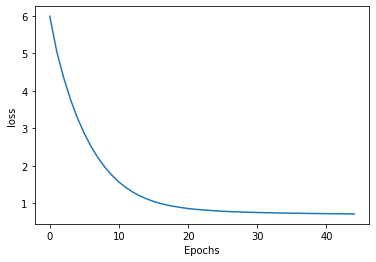

In [41]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show
    
plot_graphs(history, 'loss')

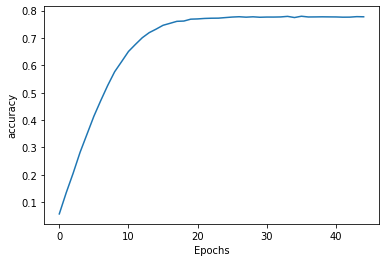

In [42]:
plot_graphs(history, 'accuracy')

In [43]:
seed_text = "bruh"
next_words = 20  ##More words is more gibberish
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

bruh rooftops i am a puzzle you're the missing piece the two trapezes the new storm through yourself pillars through yourself


In [44]:
model.save('coldplay_model_v1.h5')

In [45]:
# model = tensorflow.keras.models.load_model('coldplay_model_v1.h5')

In [47]:
seed_text = "bruh"
next_words = 20  ##More words is more gibberish
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

bruh rooftops i am a puzzle you're the missing piece the two trapezes the new storm through yourself pillars through yourself
